Get Product Dimensions (predetermined bounding boxes)

In [1]:
pip install ultralytics opencv-python numpy torch torchvision torchaudio

  Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl.metadata (20 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
  Using cached charset_normalizer-3.4.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (35 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 14.1 MB/s eta 0:00:00
Using cached opencv_python-4.11.0.86-cp37-abi3-macosx_13_0_arm64.whl (37.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 M

In [1]:
pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 38.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#check image shape
import os
import cv2

#path to images folder
image_folder = "images/train"

#dimensions of the first few images
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)
    img = cv2.imread(img_path)
    
    if img is not None:
        h, w, _ = img.shape
        print(f"Image: {img_name} → Width: {w}, Height: {h}")
    else:
        print(f"Could not open {img_name}")

    #check a few images
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        break


Image: IMG_4670.jpeg → Width: 3024, Height: 4032
Image: IMG_4666.jpeg → Width: 3024, Height: 4032
Image: IMG_4674.png → Width: 4032, Height: 3024


Image: images/train/IMG_4670.jpeg
Product width: 3.2 inches
Product height: 8.4 inches


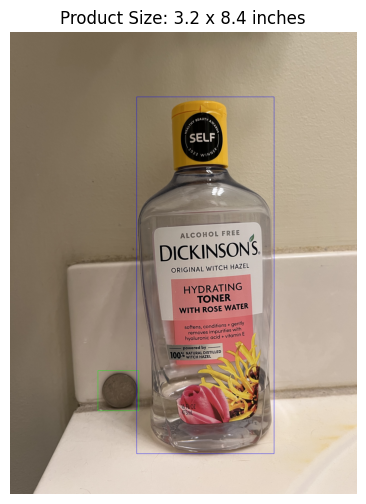

Image: images/train/IMG_4666.jpeg
Product width: 3.3 inches
Product height: 9.7 inches


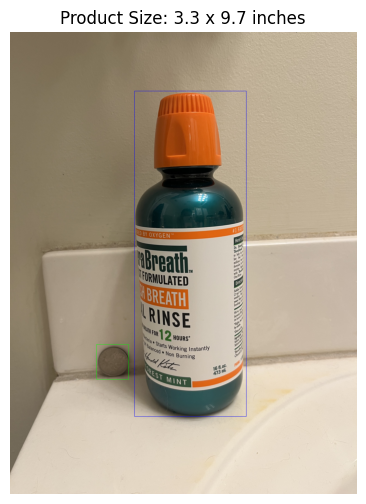

Image: images/train/IMG_4667.jpeg
Product width: 2.8 inches
Product height: 10.1 inches


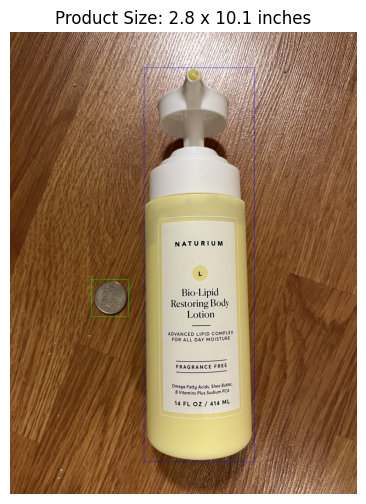

Image: images/train/IMG_4671.jpeg
Product width: 3.0 inches
Product height: 6.3 inches


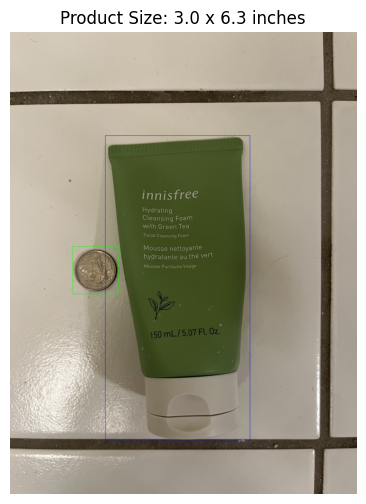

Image: images/train/IMG_6444.jpeg
Product width: 2.1 inches
Product height: 3.2 inches


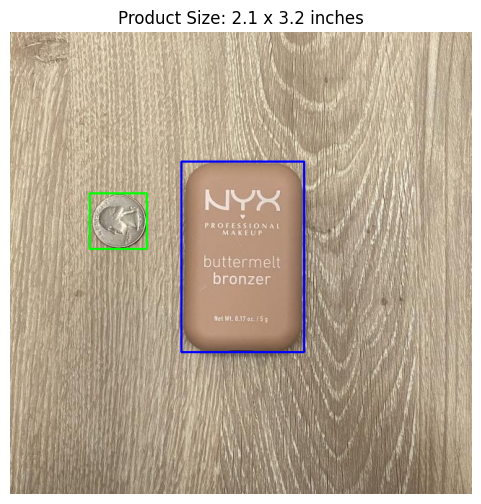

Image: images/train/IMG_4668.jpeg
Product width: 1.2 inches
Product height: 4.0 inches


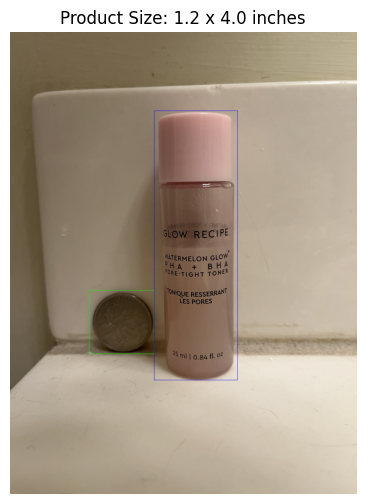

Image: images/train/IMG_4673.jpeg
Product width: 2.8 inches
Product height: 2.8 inches


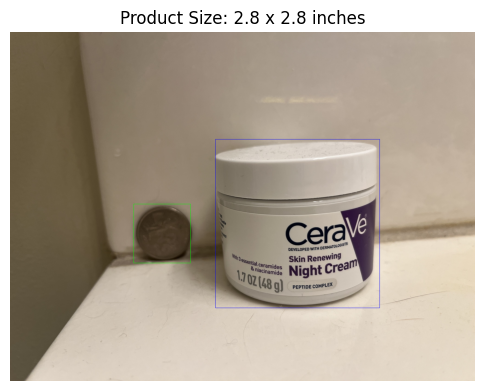

Image: images/train/IMG_4674.png
Product width: 29.1 inches
Product height: 13.5 inches


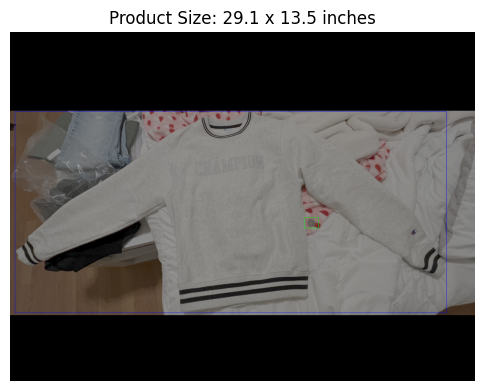

In [ ]:
#get dimensions

import cv2
import matplotlib.pyplot as plt
import os
import glob

#set directories for images and labels
image_dir = 'images/train/'  # path to images
label_dir = 'labels/train/'  # path to YOLO annotation files

#get all image file paths
image_paths = glob.glob(os.path.join(image_dir, '*.jpeg')) + glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir,'*.png'))

#reference object size in inches (U.S. quarter)
quarter_diameter = 0.955 

#process each image
for image_path in image_paths:
    #load image
    image = cv2.imread(image_path)
    height, width, _ = image.shape  #get image dimensions

    #find corresponding annotation file (same name but .txt)
    base_filename = os.path.splitext(os.path.basename(image_path))[0]
    annotation_file = os.path.join(label_dir, f"{base_filename}.txt")

    if not os.path.exists(annotation_file):
        print(f"Skipping {image_path}: No corresponding annotation file.")
        continue

    annotations = []

    #read YOLOv8 annotations
    with open(annotation_file, 'r') as f:
        for line in f.readlines():
            values = line.strip().split()
            class_id = int(values[0])  #class ID
            x_center = float(values[1]) * width
            y_center = float(values[2]) * height
            box_width = float(values[3]) * width
            box_height = float(values[4]) * height

            #convert to top-left corner format (x_min, y_min, width, height)
            x_min = int(x_center - box_width / 2)
            y_min = int(y_center - box_height / 2)
            box_width = int(box_width)  #convert width to int
            box_height = int(box_height)  #convert height to int

            annotations.append({'class_id': class_id, 'bbox': [x_min, y_min, box_width, box_height]})

    #define reference object (assuming first annotation is the reference)
    reference_bbox = annotations[0]['bbox']  
    product_bbox = annotations[1]['bbox']  

    #compute pixels per inch using the reference object
    quarter_width_pixels = reference_bbox[2]  # Width in pixels
    pixels_per_inch = quarter_width_pixels / quarter_diameter  # Pixels per inch

    #convert product dimensions from pixels to inches
    product_width_pixels = product_bbox[2]
    product_height_pixels = product_bbox[3]

    product_width_inches = product_width_pixels / pixels_per_inch
    product_height_inches = product_height_pixels / pixels_per_inch

    print(f"Image: {image_path}")
    print(f"Product width: {product_width_inches:.1f} inches")
    print(f"Product height: {product_height_inches:.1f} inches")

    #draw bounding boxes
    cv2.rectangle(image, (reference_bbox[0], reference_bbox[1]),
                  (reference_bbox[0] + reference_bbox[2], reference_bbox[1] + reference_bbox[3]),
                  (0, 255, 0), 2)  #green for reference object

    cv2.rectangle(image, (product_bbox[0], product_bbox[1]),
                  (product_bbox[0] + product_bbox[2], product_bbox[1] + product_bbox[3]),
                  (255, 0, 0), 2)  #blue for product

    #convert BGR (OpenCV format) to RGB (matplotlib format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    #display image
    plt.figure(figsize=(6, 6))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Product Size: {product_width_inches:.1f} x {product_height_inches:.1f} inches")
    plt.show()


